In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [76]:
pkmn = pd.read_csv('Pokemon.csv')
combats = pd.read_csv("./pokemon-challenge (1)/combats.csv")

In [77]:
pkmn

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [83]:
combats['Winner'].max()

800

In [80]:
combats.loc[798]

First_pokemon     380
Second_pokemon    694
Winner            694
Name: 798, dtype: int64

In [79]:
combats.loc[797]

First_pokemon     260
Second_pokemon    215
Winner            215
Name: 797, dtype: int64

In [53]:
pkmn.rename(columns=({'#':'Number'}), inplace=True)
pkmn.drop_duplicates(subset='Number', keep='last', inplace=True)
pkmn.set_index('Number', inplace=True)
pkmn.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Number,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [54]:
pkmn.shape

(721, 12)

In [55]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [57]:
combats_join = pd.merge(combats, pkmn[['Name']], left_on='Winner', right_index=True, how='left')

#combats_join.drop('Number', axis=1, inplace=True)
combats_join.rename(columns={'Name':"winner_number"}, inplace=True)
combats_join.head()

,First_pokemon,Second_pokemon,Winner,winner_number
0,266,298,298,Azurill
1,702,701,701,Hawlucha
2,191,668,668,Pyroar
3,237,683,683,Aromatisse
4,151,231,151,Mew


In [58]:
combats_join.head()

<bound method NDFrame.head of        First_pokemon  Second_pokemon  Winner            winner_number
0                266             298     298                  Azurill
1                702             701     701                 Hawlucha
2                191             668     668                   Pyroar
3                237             683     683               Aromatisse
4                151             231     151                      Mew
...              ...             ...     ...                      ...
49995            707             126     707                   Klefki
49996            589             664     589               Escavalier
49997            303             368     368                 Gorebyss
49998            109              89     109                  Koffing
49999              9              73       9  BlastoiseMega Blastoise

[50000 rows x 4 columns]>

In [64]:
combats_join['Winner'].value_counts()

163    152
438    136
154    136
428    134
314    133
      ... 
577      5
237      4
639      4
290      3
190      3
Name: Winner, Length: 783, dtype: int64

In [60]:
combats.shape

(50000, 3)

In [67]:
# Use left join bc we want to preserve all 721 Pokemon numbers after the join.  winners only has pokemon numbers that were used in combat, some of the 721 were never used and aren't found in the sample.  When we do the left join though, any Pokemon numbers in the left df (pokemon) that aren't found in the right df (winners), they'll get a NaN value, so we fill those in at the end.  We also drop_duplicate numbers, keeping the last, so we only focus on highest evolutions that would typically be used in combat.
winners = combats_join['Winner'].value_counts()
pkmn_join = pd.merge(pkmn, winners, how='left', left_index=True, right_index=True, validate='m:1')
pkmn_join.rename(mapper={'Winner':'Wins'}, axis=1, inplace=True)
pkmn_join['Wins'].fillna(value=0, inplace=True)
pkmn_join.sort_values('Wins', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins
Number,,,,,,,,,,,,,
163,Hoothoot,Normal,Flying,262,60,30,30,36,56,50,2,False,152.0
154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False,136.0
438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False,136.0
428,LopunnyMega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False,134.0
432,Purugly,Normal,NaN,452,71,82,64,64,59,112,4,False,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Floatzel,Water,NaN,495,85,105,55,85,50,115,4,False,0.0
66,Machop,Fighting,NaN,305,70,80,50,35,35,35,1,False,0.0
90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False,0.0


In [73]:
winners.index.unique().value_counts()

163    1
755    1
347    1
351    1
627    1
      ..
397    1
474    1
130    1
795    1
190    1
Length: 783, dtype: int64

In [75]:
pkmn_join.index.unique()

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            712, 713, 714, 715, 716, 717, 718, 719, 720, 721],
           dtype='int64', name='Number', length=721)

In [68]:
winners.sum()

50000

In [69]:
pkmn_join['Wins'].sum()

45140.0

In [44]:
pkmn.loc[720]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Number,,,,,,,,,,,,
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# kNN classification

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [166]:
pkmn_join_copy = pkmn_join.copy(deep=True)
numeric_cols = pkmn_join_copy.loc[:,['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Wins']]
numeric_cols_labels = list(numeric_cols.columns)

In [167]:
scaler = StandardScaler()
scaler.fit(numeric_cols)
pkmn_join_copy.loc[:, numeric_cols_labels] = scaler.transform(numeric_cols)

categorical_cols = pkmn_join_copy.loc[:, ['Generation', 'Type 1', 'Type 2']]
categorical_cols_labels = list(categorical_cols.columns)
scaled_with_dummies = pd.get_dummies(pkmn_join_copy.drop(['Number', 'Name', 'Legendary'], axis=1), columns=categorical_cols_labels)
target_df = pkmn_join_copy['Legendary']

In [168]:
scaled_with_dummies

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Wins,Generation_1,Generation_2,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,-0.900922,-0.906772,-0.874461,-0.755113,-0.173117,-0.192504,-0.745750,-0.700904,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.168055,-0.326045,-0.465524,-0.303165,0.299557,0.347836,-0.225476,-0.504668,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.685173,0.448258,0.729830,1.633758,1.623044,1.788740,0.468223,2.373464,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.976736,-1.139063,-0.780091,-0.948806,-0.330675,-0.732843,-0.052051,0.018629,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.168055,-0.403475,-0.402611,-0.464575,0.299557,-0.192504,0.468223,-0.308432,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.148480,2.229154,1.704987,0.729861,1.906649,0.996243,1.127237,1.065222,0,0,...,0,0,0,0,0,0,0,0,0,0
794,1.474579,1.532282,0.729830,1.569194,0.331069,0.888175,0.988497,0.781770,0,0,...,0,0,1,0,0,0,0,0,0,0
796,2.316956,-0.713196,2.617231,1.214092,2.820485,1.428514,1.508771,-0.373844,0,0,...,0,0,0,0,0,0,0,0,0,0
798,2.148480,0.448258,2.617231,-0.400011,3.135602,2.148967,0.468223,0.585533,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
scaled_with_dummies.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Wins', 'Generation_1', 'Generation_2', 'Generation_3', 'Generation_4',
       'Generation_5', 'Generation_6', 'Type 1_Bug', 'Type 1_Dark',
       'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting',
       'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass',
       'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison',
       'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water',
       'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric',
       'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying',
       'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water'],
      dtype='object')

In [170]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies, target_df, test_size=0.2)

In [171]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9724137931034482

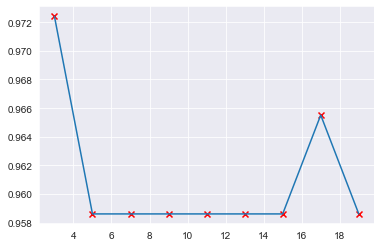

In [179]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies, target_df, test_size=0.2)
training_scores = []
k_values = np.arange(3, 21, 2)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    new_score = knn.score(X_test, y_test)
    training_scores.append(new_score)
plt.scatter(k_values, training_scores, color='red', marker='x')
plt.plot(k_values, training_scores)

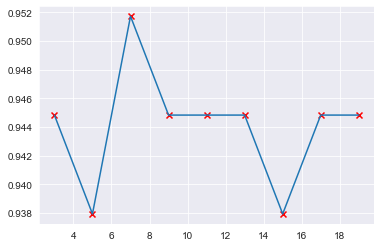

In [200]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies, target_df, test_size=0.2)
training_scores = []
k_values = np.arange(3, 21, 2)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    new_score = knn.score(X_test, y_test)
    training_scores.append(new_score)
plt.scatter(k_values, training_scores, color='red', marker='x')
plt.plot(k_values, training_scores)

try knn again but take out wins column to see if accuracy goes down.  If it does, then this would be a good example of feature engineering because I added the wins column on my own.

In [184]:
pkmn_new = pkmn.copy(deep=True)
pkmn_new.drop_duplicates(subset='Number', keep='last', inplace=True)
pkmn_new.drop(labels='Number', axis=1, inplace=True)
pkmn_new

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
793,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [185]:
numeric_cols = pkmn_new.select_dtypes(include=[np.int, np.float]).drop('Generation', axis=1)
new_scaler = StandardScaler()
new_scaler.fit(numeric_cols)
new_cols = new_scaler.transform(numeric_cols)
pkmn_new[list(numeric_cols.columns)] = new_cols


target_df = pkmn_new['Legendary']
pkmn_new.drop(['Legendary', 'Name'], axis=1, inplace=True)



In [186]:
object_cols_labels = list(pkmn_new.select_dtypes(include=object).columns)
object_cols_labels.append('Generation')
scaled_with_dummies_2 = pd.get_dummies(pkmn_new, columns=object_cols_labels)
scaled_with_dummies_2.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric',
       'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying',
       'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice',
       'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock',
       'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark',
       'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting',
       'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass',
       'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water',
       'Generation_1', 'Generation_2', 'Generation_3', 'Generation_4',
       'Generation_5', 'Generation_6'],
      dtype='object')

In [195]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(scaled_with_dummies_2, target_df)
neigh.score(scaled_with_dummies_2, target_df)

0.9653259361997226

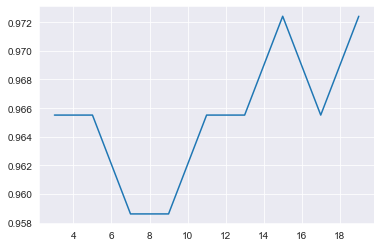

array([[136,   0],
       [  4,   5]])

In [209]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies_2, target_df, test_size=0.2)
scores = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    scores.append(score)
plt.plot(k_values, scores)
plt.show()


preds = neigh.predict(X_test)
confusion_matrix(y_test, preds)

In [189]:
preds = neigh.predict(X_test)
confusion_matrix(y_test, preds)

array([[135,   0],
       [  0,  10]])

In [211]:
dropped = scaled_with_dummies_2.drop(['Type 1_Electric', 'Generation_2', 'Type 2_Rock', 'Total'], axis=1)
dropped

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Fairy,...,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Steel,Type 2_Water,Generation_1,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.906772,-0.874461,-0.755113,-0.173117,-0.192504,-0.745750,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.326045,-0.465524,-0.303165,0.299557,0.347836,-0.225476,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.448258,0.729830,1.633758,1.623044,1.788740,0.468223,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,-1.139063,-0.780091,-0.948806,-0.330675,-0.732843,-0.052051,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,-0.403475,-0.402611,-0.464575,0.299557,-0.192504,0.468223,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.229154,1.704987,0.729861,1.906649,0.996243,1.127237,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
794,1.532282,0.729830,1.569194,0.331069,0.888175,0.988497,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
796,-0.713196,2.617231,1.214092,2.820485,1.428514,1.508771,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
798,0.448258,2.617231,-0.400011,3.135602,2.148967,0.468223,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


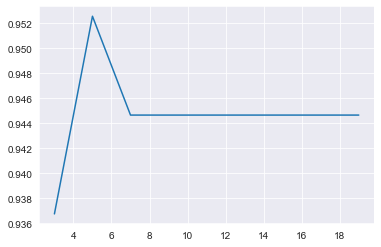

In [218]:
X_train, X_test, y_train, y_test = train_test_split(dropped, target_df, test_size=0.35)
scores = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    scores.append(score)
plt.plot(k_values, scores)

In [220]:
scaled_with_dummies_2

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.900922,-0.906772,-0.874461,-0.755113,-0.173117,-0.192504,-0.745750,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.168055,-0.326045,-0.465524,-0.303165,0.299557,0.347836,-0.225476,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.685173,0.448258,0.729830,1.633758,1.623044,1.788740,0.468223,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.976736,-1.139063,-0.780091,-0.948806,-0.330675,-0.732843,-0.052051,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,-0.168055,-0.403475,-0.402611,-0.464575,0.299557,-0.192504,0.468223,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.148480,2.229154,1.704987,0.729861,1.906649,0.996243,1.127237,0,1,0,...,0,0,0,0,0,0,0,0,0,1
794,1.474579,1.532282,0.729830,1.569194,0.331069,0.888175,0.988497,0,0,1,...,0,0,0,0,0,0,0,0,0,1
796,2.316956,-0.713196,2.617231,1.214092,2.820485,1.428514,1.508771,0,0,0,...,0,0,0,0,0,0,0,0,0,1
798,2.148480,0.448258,2.617231,-0.400011,3.135602,2.148967,0.468223,0,0,0,...,0,0,0,0,0,0,0,0,0,1


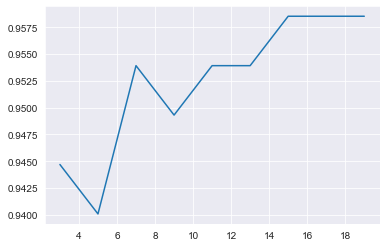

In [222]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies_2.drop(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def'], axis=1), target_df, test_size=0.3)
scores = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    scores.append(score)
plt.plot(k_values, scores)

In [228]:
target_df_int = target_df.astype(int)
target_df_int

0      0
1      0
3      0
4      0
5      0
      ..
793    1
794    1
796    1
798    1
799    1
Name: Legendary, Length: 721, dtype: int64

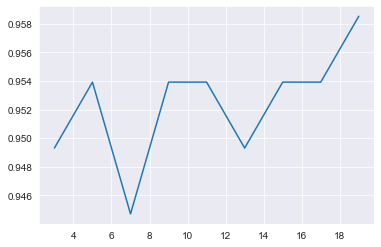

In [230]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies_2, target_df_int, test_size=0.3)
scores = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    scores.append(score)
plt.plot(k_values, scores)

0.9262672811059908
0.9262672811059908
0.9262672811059908
0.9262672811059908
0.9262672811059908
0.9216589861751152
0.9216589861751152
0.9216589861751152
0.9216589861751152


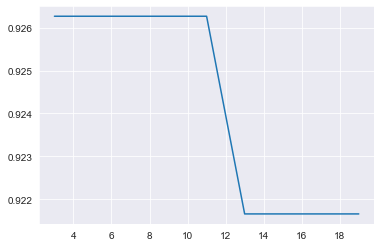

In [275]:
new_list = numeric_cols_labels[:]
new_list.append('Wins')

X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies[new_list], target_df_int, test_size=0.3)
scores = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    print(score)
    scores.append(score)
plt.plot(k_values, scores)


preds = neigh.predict(X_test)

In [279]:
y_test

41     0
181    0
770    0
479    0
295    0
      ..
10     0
13     0
433    0
67     0
45     0
Name: Legendary, Length: 217, dtype: int64

In [256]:
new_list

['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [257]:
scaled_with_dummies

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Wins,Generation_1,Generation_2,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,-0.900922,-0.906772,-0.874461,-0.755113,-0.173117,-0.192504,-0.745750,-0.700904,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.168055,-0.326045,-0.465524,-0.303165,0.299557,0.347836,-0.225476,-0.504668,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.685173,0.448258,0.729830,1.633758,1.623044,1.788740,0.468223,2.373464,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.976736,-1.139063,-0.780091,-0.948806,-0.330675,-0.732843,-0.052051,0.018629,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.168055,-0.403475,-0.402611,-0.464575,0.299557,-0.192504,0.468223,-0.308432,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.148480,2.229154,1.704987,0.729861,1.906649,0.996243,1.127237,1.065222,0,0,...,0,0,0,0,0,0,0,0,0,0
794,1.474579,1.532282,0.729830,1.569194,0.331069,0.888175,0.988497,0.781770,0,0,...,0,0,1,0,0,0,0,0,0,0
796,2.316956,-0.713196,2.617231,1.214092,2.820485,1.428514,1.508771,-0.373844,0,0,...,0,0,0,0,0,0,0,0,0,0
798,2.148480,0.448258,2.617231,-0.400011,3.135602,2.148967,0.468223,0.585533,0,0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
score = neigh.score(X_test, y_test)
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, pos_label=None, average='weighted')
precision = precision_score(y_test, preds, pos_label=None, average='weighted')
recall = recall_score(y_test, preds, pos_label=None, average='weighted')

In [283]:
score, accuracy, f1, precision, recall

(0.9216589861751152,
 0.9216589861751152,
 0.9013412239218691,
 0.9153799113285431,
 0.9216589861751152)

In [285]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       196
           1       0.83      0.24      0.37        21

    accuracy                           0.92       217
   macro avg       0.88      0.62      0.66       217
weighted avg       0.92      0.92      0.90       217



In [287]:
confusion_matrix(y_test, preds)

array([[195,   1],
       [ 16,   5]])

In [288]:
from sklearn.metrics import plot_confusion_matrix

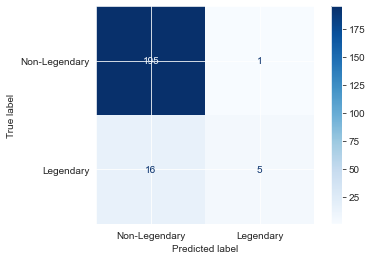

In [295]:
plot_confusion_matrix(neigh, X_test, y_test, display_labels=['Non-Legendary', 'Legendary'], cmap=plt.cm.Blues)

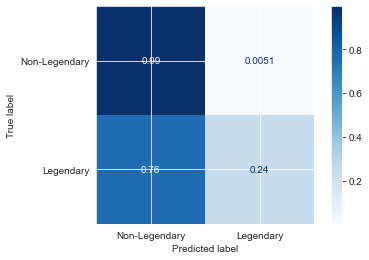

In [298]:
plot_confusion_matrix(neigh, X_test, y_test, display_labels=['Non-Legendary', 'Legendary'], cmap=plt.cm.Blues, normalize='true')

In [301]:
scaled_with_dummies

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Wins,Generation_1,Generation_2,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,-0.900922,-0.906772,-0.874461,-0.755113,-0.173117,-0.192504,-0.745750,-0.700904,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.168055,-0.326045,-0.465524,-0.303165,0.299557,0.347836,-0.225476,-0.504668,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.685173,0.448258,0.729830,1.633758,1.623044,1.788740,0.468223,2.373464,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.976736,-1.139063,-0.780091,-0.948806,-0.330675,-0.732843,-0.052051,0.018629,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.168055,-0.403475,-0.402611,-0.464575,0.299557,-0.192504,0.468223,-0.308432,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.148480,2.229154,1.704987,0.729861,1.906649,0.996243,1.127237,1.065222,0,0,...,0,0,0,0,0,0,0,0,0,0
794,1.474579,1.532282,0.729830,1.569194,0.331069,0.888175,0.988497,0.781770,0,0,...,0,0,1,0,0,0,0,0,0,0
796,2.316956,-0.713196,2.617231,1.214092,2.820485,1.428514,1.508771,-0.373844,0,0,...,0,0,0,0,0,0,0,0,0,0
798,2.148480,0.448258,2.617231,-0.400011,3.135602,2.148967,0.468223,0.585533,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
from sklearn.linear_model import LogisticRegression

In [310]:
X_train, X_test, y_train, y_test = train_test_split(scaled_with_dummies, target_df, test_size=0.4)
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.9446366782006921

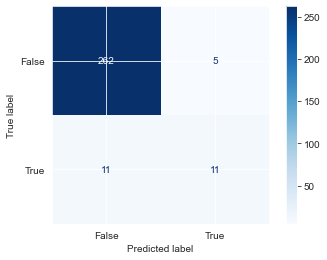

In [311]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)

In [312]:
lr_preds = lr.predict(X_test)
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       267
        True       0.69      0.50      0.58        22

    accuracy                           0.94       289
   macro avg       0.82      0.74      0.77       289
weighted avg       0.94      0.94      0.94       289



# Logistic Regression - Predicting Legendary Status

In [314]:
pkmn_join.corr()

,Number,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins
Number,1.000000,0.127597,0.110221,0.111691,0.094538,0.093311,0.087133,0.015303,0.983329,0.135022,0.076537
Total,0.127597,1.000000,0.617456,0.735214,0.629700,0.742484,0.726423,0.560393,0.062682,0.468601,0.218707
HP,0.110221,0.617456,1.000000,0.414566,0.238779,0.367111,0.380396,0.162466,0.074131,0.258512,0.080888
Attack,0.111691,0.735214,0.414566,1.000000,0.472016,0.375079,0.280380,0.363247,0.067556,0.306382,0.202075
Defense,0.094538,0.629700,0.238779,0.472016,1.000000,0.246443,0.511551,0.020167,0.042122,0.254286,0.173296
Sp. Atk,0.093311,0.742484,0.367111,0.375079,0.246443,1.000000,0.520355,0.448195,0.046933,0.408856,0.131564
Sp. Def,0.087133,0.726423,0.380396,0.280380,0.511551,0.520355,1.000000,0.255851,0.031373,0.357789,0.141602
Speed,0.015303,0.560393,0.162466,0.363247,0.020167,0.448195,0.255851,1.000000,-0.009936,0.292299,0.137897
Generation,0.983329,0.062682,0.074131,0.067556,0.042122,0.046933,0.031373,-0.009936,1.000000,0.071875,0.075536
Legendary,0.135022,0.468601,0.258512,0.306382,0.254286,0.408856,0.357789,0.292299,0.071875,1.000000,0.028745


<AxesSubplot:>

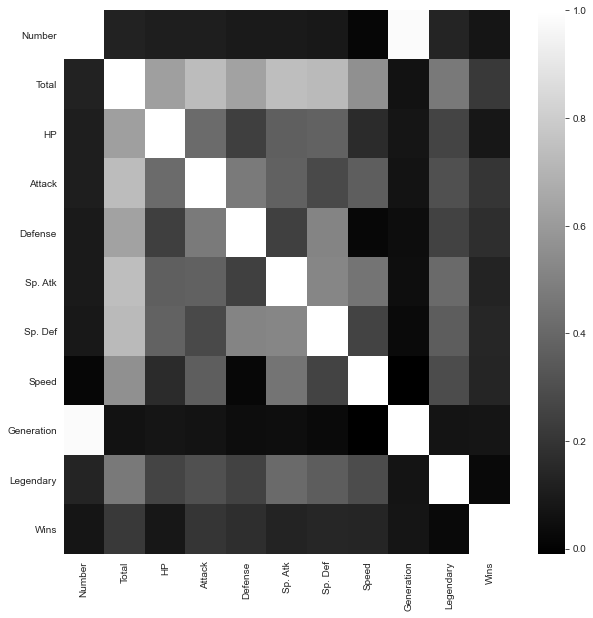

In [325]:
plt.figure(figsize=(10,10))
sns.heatmap(pkmn_join.corr(), cmap=plt.get_cmap('gist_gray'))

Based on the correlation df and heatmap above, Legendary is most highly correlated with the following 3 quantitative variables:
    1. Total
    2. Sp. Atk
    3. Sp. Def
As total is the sum of all of the other stats, HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed, I'd expect it to be collinear with the other variables.  Let's check:

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [346]:
pkmn_copy = pkmn_join.copy(deep=True)
pkmn_copy['Legendary'] = pkmn_copy['Legendary'].astype('int')

In [349]:
variance_inflation_factor(pkmn_copy.loc[:,['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].values, 6)

1.196274026187522

In [348]:
pkmn_copy.loc[:,['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,0
1,60,62,63,80,80,60,0
3,80,100,123,122,120,80,0
4,39,52,43,60,50,65,0
5,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...
793,126,131,95,131,98,99,1
794,108,100,121,81,95,95,1
796,50,160,110,160,110,110,1
798,80,160,60,170,130,80,1


In [355]:
X

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
3,80,100,123,122,120,80
4,39,52,43,60,50,65
5,58,64,58,80,65,80
...,...,...,...,...,...,...
793,126,131,95,131,98,99
794,108,100,121,81,95,95
796,50,160,110,160,110,110
798,80,160,60,170,130,80


In [362]:
def calc_vif(X):
    """
    X: A pandas DataFrame object of numerical independent variables to be used in regression,
    Calculates the variance inflation factor of each independent variable in X
    against all of the other independent variables in X"""
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [370]:
new_df = pkmn_copy.loc[:,['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']]
X = new_df.iloc[:,:-1]
calc_vif(X)

,Variables,VIF
0,HP,9.547204
1,Attack,12.237728
2,Defense,10.634304
3,Sp. Atk,10.107861
4,Sp. Def,13.977748
5,Speed,7.828287


In [379]:
new_df = pkmn_copy.loc[:,['HP', 'Attack', 'Defense', 'Sp. Atk', 'Speed', 'Legendary']]
X = new_df.iloc[:,:-1]
calc_vif(X)

,Variables,VIF
0,HP,8.666318
1,Attack,11.705013
2,Defense,7.489038
3,Sp. Atk,8.716669
4,Speed,7.482811


In [380]:
new_df = pkmn_copy.loc[:,['HP', 'Defense', 'Sp. Atk', 'Speed', 'Legendary']]
X = new_df.iloc[:,:-1]
calc_vif(X)

,Variables,VIF
0,HP,7.751998
1,Defense,5.750589
2,Sp. Atk,8.684162
3,Speed,6.548843


In [382]:
new_df = pkmn_copy.loc[:,['Defense', 'Sp. Atk', 'Speed', 'Legendary']]
X = new_df.iloc[:,:-1]
calc_vif(X)

,Variables,VIF
0,Defense,4.636998
1,Sp. Atk,7.622556
2,Speed,6.161260


In [383]:
new_df = pkmn_copy.loc[:,['Defense', 'Speed', 'Legendary']]
X = new_df.iloc[:,:-1]
calc_vif(X)

,Variables,VIF
0,Defense,3.531473
1,Speed,3.531473


In [376]:
#scaled_with_dummies
new_df = scaled_with_dummies.loc[:,['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
X = new_df.iloc[:,:]
calc_vif(X)

,Variables,VIF
0,HP,1.377525
1,Attack,1.792407
2,Defense,1.793180
3,Sp. Atk,1.703604
4,Sp. Def,1.906937
5,Speed,1.441825


In [388]:
lr = LogisticRegression(random_state=4)
lr.fit(pkmn_join.loc[:,['Defense', 'Speed']], target_df)
lr.coef_

array([[0.0397938 , 0.05269899]])

In [389]:
lr = LogisticRegression(random_state=4)
lr.fit(scaled_with_dummies.loc[:,['Defense', 'Speed']], target_df)
lr.coef_

array([[1.16920303, 1.43639051]])

## Regression

<AxesSubplot:xlabel='Total', ylabel='Wins'>

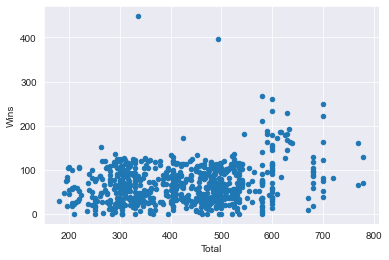

In [326]:
pkmn_join.plot.scatter('Total', 'Wins')

In [327]:
pkmn_join.Wins

0       37.0
1       46.0
3      178.0
4       70.0
5       55.0
       ...  
793    118.0
794    105.0
796     52.0
798     96.0
799     57.0
Name: Wins, Length: 721, dtype: float64

In [328]:
pkmn_join['Wins']

0       37.0
1       46.0
3      178.0
4       70.0
5       55.0
       ...  
793    118.0
794    105.0
796     52.0
798     96.0
799     57.0
Name: Wins, Length: 721, dtype: float64